# **Régression linéaire**
### Données source: températures annuelles [1880-2021]
### https://www.kaggle.com/datasets/jarredpriester/global-annual-mean-temperature

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

###### Chargement dataset 'Global_annual_mean_temp.csv'

In [41]:
df = pd.read_csv('Global_annual_mean_temp.csv')
df

Year  No_Smoothing  Lowess(5)
0    1880         -0.17      -0.10
1    1881         -0.09      -0.13
2    1882         -0.11      -0.17
3    1883         -0.18      -0.20
4    1884         -0.28      -0.24
..    ...           ...        ...
137  2017          0.92       0.91
138  2018          0.85       0.92
139  2019          0.98       0.93
140  2020          1.02       0.93
141  2021          0.84       0.94

[142 rows x 3 columns]

###### Identification des Dtype des colonnes INT64 et FLOAT64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          142 non-null    int64  
 1   No_Smoothing  142 non-null    float64
 2   Lowess(5)     142 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [43]:
df.isnull()
df.isnull().any()
df.isnull().any().any()

False

###### Regarder s'il ya des valeurs nulles dans le dataset


##### Tracer la "heatmap" des correlations entre les colonnes

<AxesSubplot:>

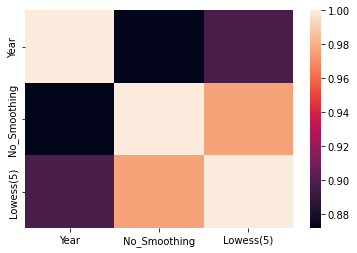

In [44]:
sns.heatmap(df.corr())

In [45]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

##### représentation des nuages de points

In [46]:
x = df['Year'] 
y_mes = df['No_Smoothing']

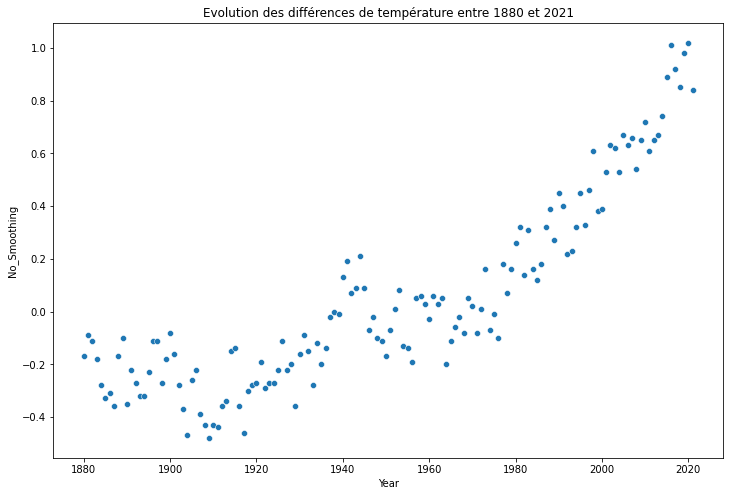

In [47]:
fig1 = plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = df['Year'], y = df['No_Smoothing'])
plt.title('Evolution des différences de température entre 1880 et 2021')
plt.show()

##### Tracer la droite de regression du nuage de points
##### En utilisant regplot de seaborn

In [48]:
fig2 = plt.figure(figsize=(12,8))
sns.regplot(data=df, x = df['Year'], y = df['No_Smoothing'], x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title('Evolution des différences de température entre 1880 et 2021')
plt.show()

## $y = ax + b$

###### L'intercept (= ordonnée à l'origine) est la valeur obtenue lorsque la variable indépendante (x) vaut zéro 

##### On crée une colonne 'intercept' ayant pour valeur 1 pour obtenir la valeur du coefficient b
##### f(x) = a*x + b*1

In [49]:
X = df[['Year']].copy()
X['intercept'] = 1
X

Year  intercept
0    1880          1
1    1881          1
2    1882          1
3    1883          1
4    1884          1
..    ...        ...
137  2017          1
138  2018          1
139  2019          1
140  2020          1
141  2021          1

[142 rows x 2 columns]

### Regression en utilisant STATMODELS
#### OLS = ordinary least squares 
##### la droite minimise l'écart au carré des erreurs. Tant que les erreurs sont normalement distribuées et homoscédastiques.


#### La méthode 'fit' entraine l'algorithme sur les données, quand le modèle a été créé.

In [50]:
model = sm.OLS(y_mes, X)
results = model.fit()
y_model = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           No_Smoothing   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     444.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.79e-45
Time:                        10:51:58   Log-Likelihood:                 44.543
No. Observations:                 142   AIC:                            -85.09
Df Residuals:                     140   BIC:                            -79.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0077      0.000     21.081      0.0

In [51]:
df['y_pre'] = 0.0077*x - 14.9364
df

Year  No_Smoothing  Lowess(5)   y_pre
0    1880         -0.17      -0.10 -0.4604
1    1881         -0.09      -0.13 -0.4527
2    1882         -0.11      -0.17 -0.4450
3    1883         -0.18      -0.20 -0.4373
4    1884         -0.28      -0.24 -0.4296
..    ...           ...        ...     ...
137  2017          0.92       0.91  0.5945
138  2018          0.85       0.92  0.6022
139  2019          0.98       0.93  0.6099
140  2020          1.02       0.93  0.6176
141  2021          0.84       0.94  0.6253

[142 rows x 4 columns]

### Création d'un nouvel échantillon de variables Xnew à prédire.

In [52]:
new_X = pd.DataFrame({'Year':[2022, 2050, 3000], 'intercept': [1, 1, 1]})

new_X
results.predict(new_X)

0    0.603449
1    0.818640
2    8.119763
dtype: float64

 ## Formule du coefficient de détermination linéaire: $$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2} $$

 ### où n est le nombre de mesures, $y_{i}$ la valeur de la mesure n°i,  &nbsp; $\hat {y_i}$ la valeur prédite correspondante et $\bar {y}$ la moyenne des mesures.

 ### https://fr.m.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination

In [53]:
# Calcul détaillé du coefficient de corrélation

def calculate_r2(y_mes, y):    
    result = 1 - (sum((y_mes - y)**2)/sum((y_mes - y_mes.mean())**2))
    return result    

In [54]:
calculate_r2(y_mes, df['y_pre'])

0.7542071384643775

In [55]:
x_bfww2 = df[df['Year']<=1950]['Year']
x_afww2 = df[df['Year']>1950]['Year']
y_bfww2 = df[df['Year']<=1950]['No_Smoothing']
y_afww2 = df[df['Year']>1950]['No_Smoothing']

# régression avant 1950:
a_bfww2,b_bfww2 = np.polyfit(x_bfww2,y_bfww2,deg=1)
# régression après 1950:
a_afww2,b_afww2 = np.polyfit(x_afww2,y_afww2,deg=1)
print(f"coefficients a et b pour la régression 'avant 1950': a:{a_bfww2}, b:{b_bfww2}")
print(f"coefficients a et b pour la régression 'avant 1950': a:{a_afww2}, b:{b_afww2}")

fig4 = plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Year'], y = df['No_Smoothing'])
plt.plot(x_bfww2, a_bfww2*x_bfww2+b_bfww2,color='red', label= 'before 1950')
plt.plot(x_afww2, a_afww2*x_afww2+b_afww2,color='green', label= 'after 1950')

plt.legend()
plt.title('Evolution des différences de température dans le temps')
plt.xlabel('Year')
plt.ylabel('No_Smoothing (°C)')
plt.show()



coefficients a et b pour la régression 'avant 1950': a:0.0036096579476860746, b:-7.111649899396292
coefficients a et b pour la régression 'avant 1950': a:0.015096914822266891, b:-29.67543058350092


#### Suivant la tendance de la droite verte, création d'un nouveau modèle à partir de 1950

In [56]:
df_glory = df[df['Year'] > 1950]
df_glory

Year  No_Smoothing  Lowess(5)   y_pre
71   1951         -0.07      -0.07  0.0863
72   1952          0.01      -0.07  0.0940
73   1953          0.08      -0.07  0.1017
74   1954         -0.13      -0.06  0.1094
75   1955         -0.14      -0.06  0.1171
..    ...           ...        ...     ...
137  2017          0.92       0.91  0.5945
138  2018          0.85       0.92  0.6022
139  2019          0.98       0.93  0.6099
140  2020          1.02       0.93  0.6176
141  2021          0.84       0.94  0.6253

[71 rows x 4 columns]

In [57]:
x_glo = df_glory['Year'] 
y_glo = df_glory['No_Smoothing']

In [58]:
fig3 = plt.figure(figsize=(12,8))
sns.regplot(data=df_glory, x = df_glory['Year'], y = df_glory['No_Smoothing'], 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, 
            ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, 
            robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, 
            x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.legend()
plt.title('Evolution des différences de température à partir de 1950')
plt.xlabel('Year')
plt.ylabel('No_Smoothing (°C)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [59]:
X_glo = df_glory[['Year']].copy()
X_glo['intercept'] = 1
X_glo

Year  intercept
71   1951          1
72   1952          1
73   1953          1
74   1954          1
75   1955          1
..    ...        ...
137  2017          1
138  2018          1
139  2019          1
140  2020          1
141  2021          1

[71 rows x 2 columns]

In [60]:
model = sm.OLS(y_glo, X_glo)
results_glo = model.fit()
y_model = results_glo.predict(X_glo)
print(results_glo.summary())

                            OLS Regression Results                            
Dep. Variable:           No_Smoothing   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     486.9
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           5.59e-33
Time:                        10:51:59   Log-Likelihood:                 51.912
No. Observations:                  71   AIC:                            -99.82
Df Residuals:                      69   BIC:                            -95.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0151      0.001     22.065      0.0

87% de la variance de la température (i.e la variable à expliquer) est expliquée par le modèle.

Hypothèse nulle : Le coefficient est égale à 0.

La probabilité (P-value) d'observer que le coefficient 'year' (a = 0,0151) sachant que le vrai coef (celui de l'hypothèse nulle) est égale à 0 est nulle (==> P-value = 0).

In [61]:
new_X_glo = pd.DataFrame({'Year':[2022, 2050, 3000], 'intercept': [1, 1, 1]})
new_X_glo
results_glo.predict(new_X_glo)

0     0.850531
1     1.273245
2    15.615314
dtype: float64

In [62]:
df_glory['y_glo_pre'] = 0.0151*x_glo - 29.6754
df_glory

/var/folders/42/q06fptgx25386sr493km2ql40000gn/T/ipykernel_39570/4207923223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glory['y_glo_pre'] = 0.0151*x_glo - 29.6754


Year  No_Smoothing  Lowess(5)   y_pre  y_glo_pre
71   1951         -0.07      -0.07  0.0863    -0.2153
72   1952          0.01      -0.07  0.0940    -0.2002
73   1953          0.08      -0.07  0.1017    -0.1851
74   1954         -0.13      -0.06  0.1094    -0.1700
75   1955         -0.14      -0.06  0.1171    -0.1549
..    ...           ...        ...     ...        ...
137  2017          0.92       0.91  0.5945     0.7813
138  2018          0.85       0.92  0.6022     0.7964
139  2019          0.98       0.93  0.6099     0.8115
140  2020          1.02       0.93  0.6176     0.8266
141  2021          0.84       0.94  0.6253     0.8417

[71 rows x 5 columns]

In [63]:
calculate_r2(y_glo, df_glory['y_glo_pre'])

0.8755243282900478

## Les conditions d'utilisation de la régression linéaire
- Echantillon : 

      Doit être représentatif (à 10 % de la population totale)

      Independant (random)
      calcul de la covariance : pas de dépendance entre les variables agissant sur le modèle

- Homoscédasticité : La variance des erreurs ne change pas en fonction de l'évolution des échantillons

- La distribution des résidus (Y - Ÿ) suit une loi Normale 
